In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
os.chdir("/scratch/ewalt/pdm/rs-uncertainty")
from src.metrics import StratifiedRCU
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import numpy as np

In [2]:
path = "/scratch/ewalt/pdm/rs-uncertainty/results/2023-04-25_17-48-18_cloud_threshold_0-50"

In [3]:
rcu = StratifiedRCU.from_json(path+"/rcu.json")

In [8]:
np.nansum(rcu.histogram[:,:,:,[0,1,2]], axis=-1).shape

(1, 5, 39)

## Log upscaling

In [11]:
k = 10
rcu2 = rcu.empty_copy(k=k)

In [ ]:
offsets = np.logspace(1, )

In [12]:
# linear (k=2)
hi_bins = [0, 1, 2, 3, 4, 5] # 6 bins
bin_map = [[0, 1], [2, 3], [4, 5]] # constant offset

In [ ]:
# log (k=2)
hi_bins = [0, 1, 2, 3, 4, 5] # 6 bins
bin_map = [[], [0, 1], [ 2, 3, 4, 5]] # exponential offset

$$
\delta_i = \frac{M}{k}e^{-(k-i)} \\
-(beta-k) = 0
$$

In [30]:
np.log(1)

0.0

In [14]:
offsets = [[10**0]]
offsets

[[1]]

In [73]:
def exponential_offset(i, M, k):
    print(M/k, i, 1.1**(-(M/k-i)))
    return M/k*np.e**(-0.2*(M/k-i))

In [74]:
exponential_offset(0, 1500, 100), exponential_offset(7, 1500, 100), exponential_offset(15, 1500, 100)

15.0 0 0.23939204936916336
15.0 7 0.4665073802097331
15.0 15 1.0


(0.7468060255179593, 3.0284477699198313, 15.0)

In [ ]:
10**(-())

In [134]:
lorcu = rcu.upsample(k=1)
hdf = pd.DataFrame(columns=["variable", "count", "variance"])
for i in range(lorcu.histogram.shape[1]):
    H = np.nansum(lorcu.histogram[0,i], axis=0)
    var = np.full(H.shape, str(i))
    bins = lorcu.histogram.bins[i]
    hdf = pd.concat([hdf, pd.DataFrame({"variable": var, "count": H, "variance": bins})])
    hdf = hdf[hdf.variance<50]

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)


In [135]:
hhdf = hdf.groupby(["variance", "variable"]).sum().reset_index()

In [136]:
hhdf

,variance,variable,count
0,8.641304e-07,4,86561.0
1,1.063788e-04,2,328.0
2,1.313164e-04,4,115519.0
3,1.380097e-04,3,99.0
4,1.652711e-04,3,1772.0
...,...,...,...
4822,4.934619e+01,0,1279.0
4823,4.944142e+01,1,27.0
4824,4.965159e+01,1,37.0
4825,4.986175e+01,1,32.0


<AxesSubplot:xlabel='variance', ylabel='count'>

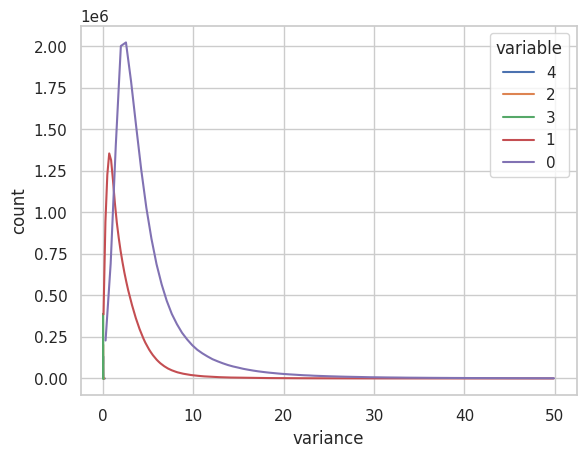

In [137]:
sns.lineplot(data=hhdf, x="variance", hue="variable", y="count")

<AxesSubplot:xlabel='variance', ylabel='Count'>

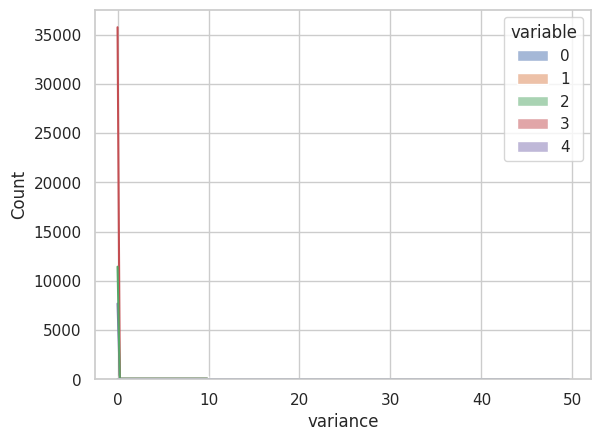

In [130]:
sns.histplot(data=hdf, x="variance", hue="variable", bins=5, kde=True)

In [100]:
hdf

,variable,count,variance
0,0,228439.0,0.280059
1,0,691599.0,0.844037
2,0,1400036.0,1.408016
3,0,2001002.0,1.971994
4,0,2022456.0,2.535973
...,...,...,...
1495,4,0.0,0.195027
1496,4,0.0,0.195157
1497,4,0.0,0.195288
1498,4,0.0,0.195418


[0.00428973 0.10349721 0.20270469 0.30191217 0.40111965 0.50032713
 0.59953461 0.69874209 0.79794957 0.89715705 0.99636453]


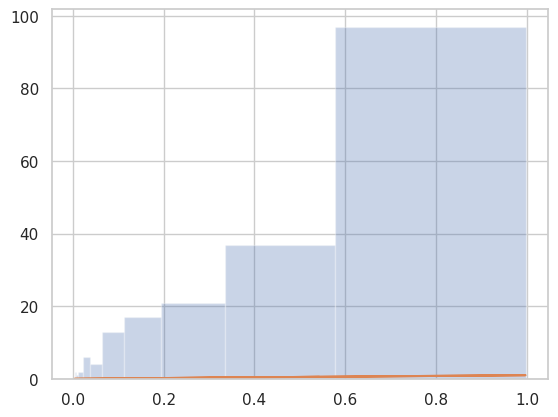

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    print(bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, alpha=0.3)
    plt.plot(x,x)
    #plt.xscale('log')

plot_loghist(np.random.rand(200), 10)

In [149]:
logbins = np.logspace(rcu.histogram.lo, rcu.histogram.hi, rcu.histogram.bins.shape[1])

In [151]:
logbins.min(axis=0), logbins.max(axis=0)

(array([1.90571925, 1.12784311, 1.00024498, 1.00031783, 1.00000199]),
 array([       inf,        inf, 1.35123258, 1.09901287, 1.56873195]))

In [152]:
rcu.histogram.lo, rcu.histogram.hi

(array([2.80058920e-01, 5.22486903e-02, 1.06378830e-04, 1.38009738e-04,
        8.64130357e-07]),
 array([8.45683777e+02, 3.15092102e+02, 1.30730107e-01, 4.10027765e-02,
        1.95548743e-01]))

In [154]:
np.exp(rcu.histogram.lo), np.exp(rcu.histogram.hi)

/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


(array([1.32320777, 1.05363774, 1.00010638, 1.00013802, 1.00000086]),
 array([            inf, 6.96243593e+136, 1.13966015e+000, 1.04185500e+000,
        1.21597806e+000]))

/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


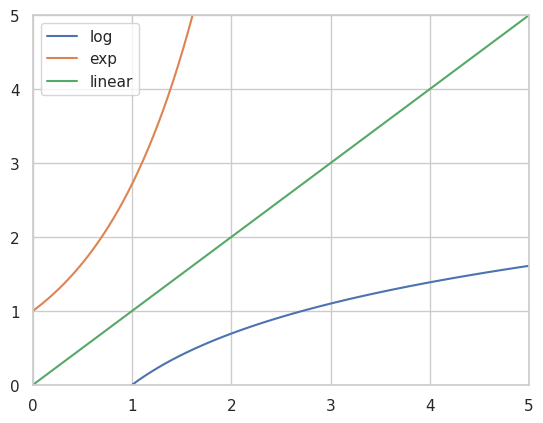

In [171]:
x = np.linspace(0,5,100)
plt.plot(x, np.log(x), label="log")
plt.plot(x, np.exp(x), label="exp")
plt.plot(x,x, label="linear")
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.show()

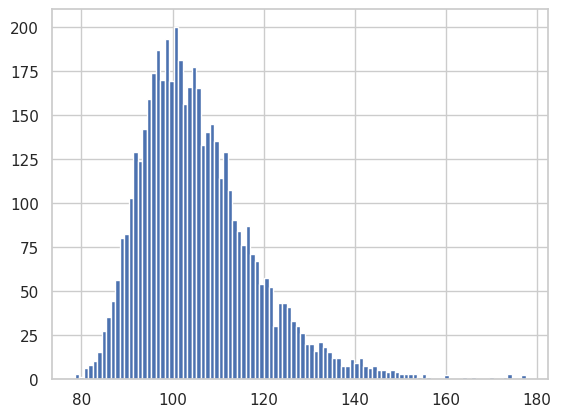

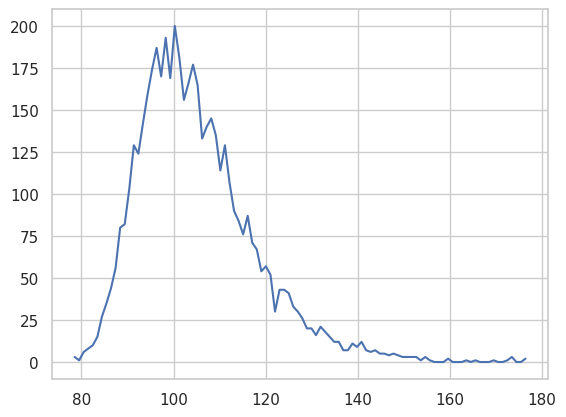

In [306]:
vals = np.random.gumbel(0.1, 0.01, 5000)*1000
H, bins, _ = plt.hist(vals, 100, density=False)
plt.plot()
plt.show()
plt.plot(bins[:-1], H)

In [360]:
rcu.histogram.shape

[autoreload of src.metrics failed: Traceback (most recent call last):
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


(1, 5, 39, 1500)

In [355]:
k = 10
log_bins = np.stack([np.logspace(
    np.log10(rcu.histogram.lo[i]),
    np.log10(rcu.histogram.hi[i]),
    rcu.histogram.shape[-1]//k,
    base=10
) for i in range(rcu.num_variables)], axis=0)
log_bin_ids = np.stack([np.digitize(rcu.histogram.bins[i], bins=log_bins[i])-1 for i in range(rcu.num_variables)], axis=0)

In [356]:
d, lo_idx

(1, 150)

In [357]:
log_bin_ids.max()

149

In [359]:
bin_map = [[[] for i in range(rcu.histogram.shape[-1]//k)] for _ in range(rcu.num_variables)]
for d in range(rcu.num_variables):
    for hi_idx, lo_idx in enumerate(log_bin_ids[d]):
        bin_map[d][lo_idx].append(hi_idx)

In [337]:
log_bins[0,0], log_bins[0,-1], log_bins[0,1]-log_bins[0,0], log_bins[0,-1]-log_bins[0,-2], 

(0.28005892038345337,
 845.683776855469,
 0.015473300226712727,
 44.27780818324345)

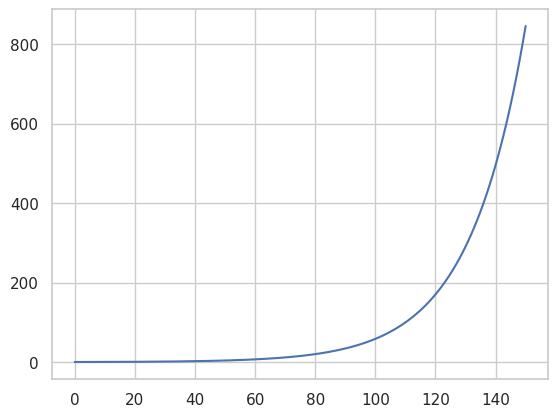

In [333]:
plt.plot(np.linspace(0,rcu.histogram.shape[-1]//k,rcu.histogram.shape[-1]//k), log_bins[0])

In [336]:
log_bins[0,-1], log_bins[0,-2]

(845.683776855469, 801.4059686722255)

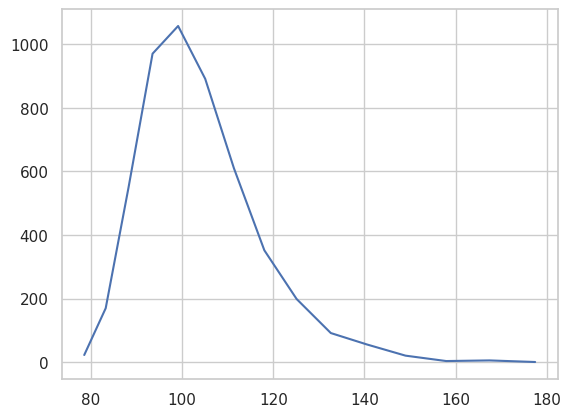

In [319]:
# linear histogram
base = 10
bins = np.logspace(np.log10(vals.min()), np.log10(vals.max()), 15, base=base)
bin_ids = np.digitize(vals, bins=bins)-1
H = np.zeros_like(bins)
for bid in bin_ids: H[bid] += 1
plt.plot(bins, H)

In [320]:
vals.min(), vals.max(), np.log(vals).min(), np.log(vals).max(), 10**vals.min(), 10**vals.max()

(78.5125110262636,
 177.4642331962898,
 4.363257988220083,
 5.178769085491495,
 3.2547004672293303e+78,
 2.912280459825041e+177)

In [321]:
bins[0]-bins[1], bins[-2]-bins[-1]

(-4.709243047419065, -10.042112373710154)

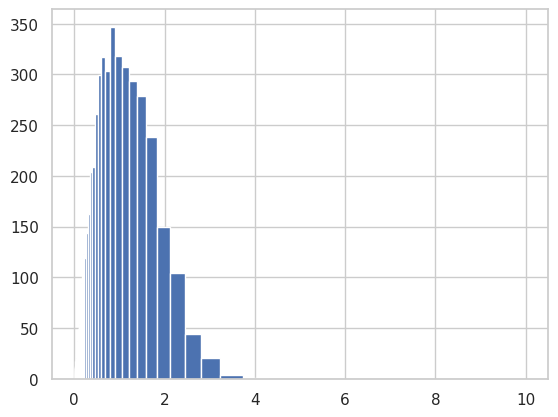

In [249]:


import pylab as pl
import numpy as np

data = np.random.normal(size=10000)

MIN, MAX = .01, 10.0

pl.figure()
pl.hist(data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
pl.show()


In [240]:
bins[0], bins[-1], np.exp(vals).min(), np.exp(vals).max()

(1.195071236150856, 1.5407819915139576, 1.0804674738108797, 1.2065212197976625)

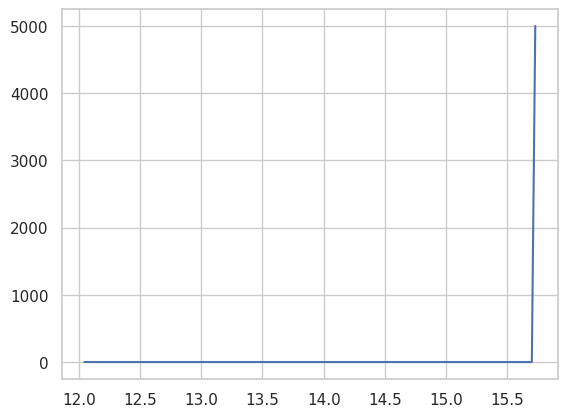

In [230]:
# log histogram
vals = np.random.gumbel(0.1, 0.01, 5000)
bins = np.logspace(np.exp(vals).min(), np.exp(vals).max(), 150)
bin_ids = np.digitize(np.log(vals), bins=bins)-1
H = np.zeros_like(bins)
for bid in bin_ids: H[bid] += 1
plt.plot(bins, H)

In [233]:
np.exp(vals).min(), np.exp(vals).max()

(1.0808352830349328, 1.1966408351473439)

In [228]:
bins

array([1.19828574, 1.20036204, 1.20244194, 1.20452545, 1.20661256,
       1.20870329, 1.21079765, 1.21289563, 1.21499725, 1.21710251,
       1.21921141, 1.22132397, 1.2234402 , 1.22556008, 1.22768365,
       1.22981089, 1.23194181, 1.23407643, 1.23621475, 1.23835677,
       1.24050251, 1.24265196, 1.24480514, 1.24696205, 1.24912269,
       1.25128708, 1.25345522, 1.25562712, 1.25780278, 1.25998221,
       1.26216541, 1.2643524 , 1.26654318, 1.26873775, 1.27093613,
       1.27313832, 1.27534432, 1.27755414, 1.2797678 , 1.28198528,
       1.28420662, 1.2864318 , 1.28866083, 1.29089373, 1.2931305 ,
       1.29537114, 1.29761566, 1.29986408, 1.30211639, 1.3043726 ,
       1.30663272, 1.30889676, 1.31116472, 1.31343661, 1.31571244,
       1.31799221, 1.32027593, 1.32256361, 1.32485526, 1.32715087,
       1.32945046, 1.33175403, 1.3340616 , 1.33637317, 1.33868874,
       1.34100832, 1.34333192, 1.34565955, 1.34799121, 1.35032691,
       1.35266666, 1.35501046, 1.35735833, 1.35971026, 1.36206

/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


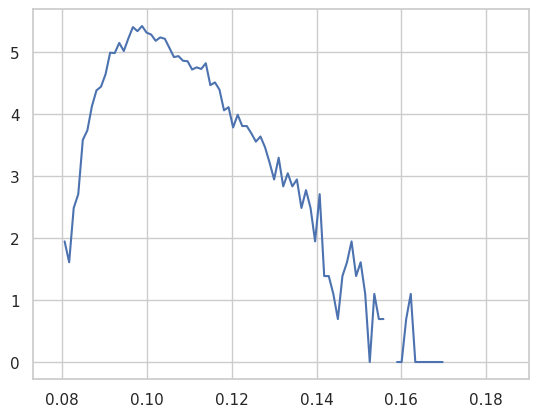

In [215]:
logH = np.log(H)
plt.plot(bins[:-1], logH)

In [91]:
sns.histplot(data=hdf, x="count", hue="variable")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2ba843dd40> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2ba843d7a0> (for post_execute):


KeyboardInterrupt: 

In [54]:
rcus = [rcu.copy(), rcu.copy()]
df = pd.concat([r.results for r in rcus])
df["cloud_threshold"] = list(chain(
    [0.5 for _ in range(len(rcus[0].results))],
    [1.0 for _ in range(len(rcus[1].results))]
))

In [56]:
df.cloud_threshold.unique()

array([0.5, 1. ])

In [57]:
df

,group,metric,kind,variable,x,cloud_threshold
0,439,mse,agg,P95,10.347160,0.5
1,439,mse,agg,MeanH,5.530955,0.5
2,439,mse,agg,Dens,0.016111,0.5
3,439,mse,agg,Gini,0.002769,0.5
4,439,mse,agg,Cover,0.021586,0.5
...,...,...,...,...,...,...
4725,global,srp,ause,P95,5.396044,1.0
4726,global,srp,ause,MeanH,2.567514,1.0
4727,global,srp,ause,Dens,0.007089,1.0
4728,global,srp,ause,Gini,0.001405,1.0


<AxesSubplot:xlabel='cloud_threshold', ylabel='x'>

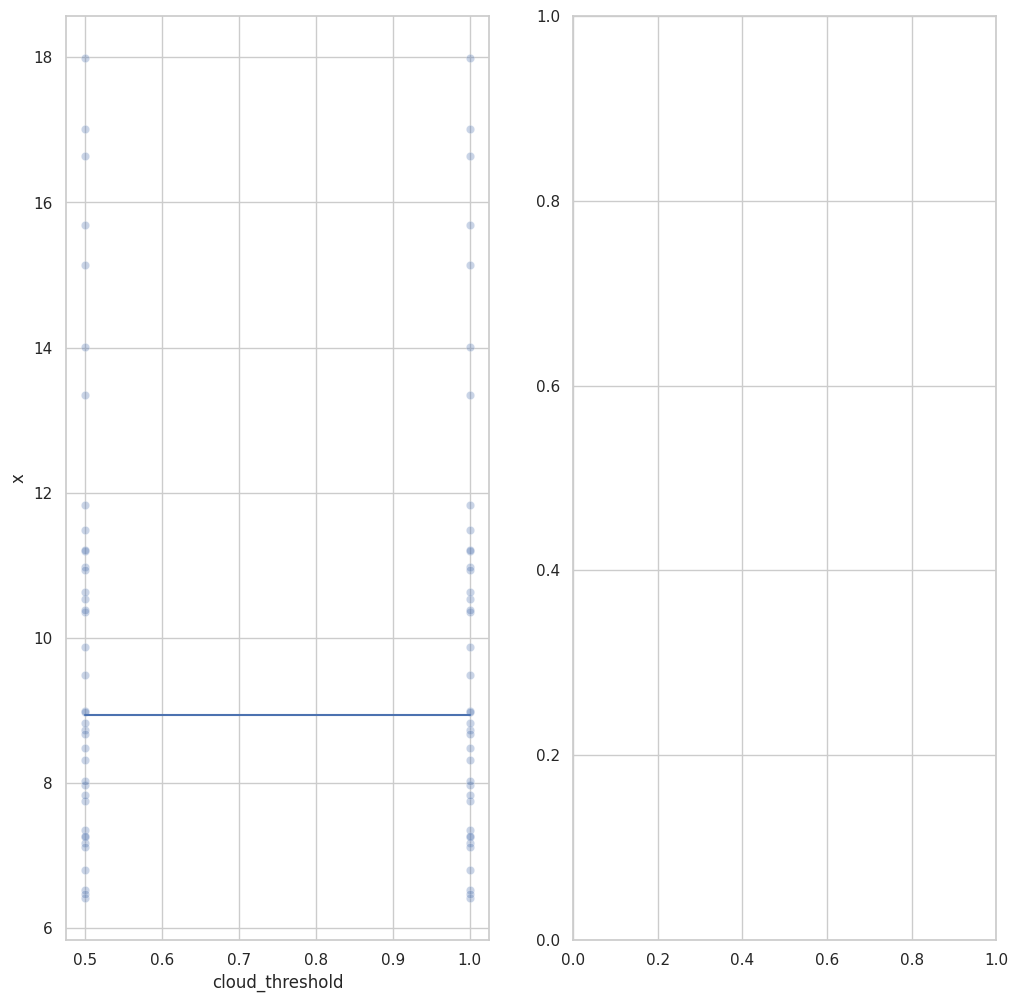

In [76]:
# VM plot
metric = "mse"
variable = "P95"
kind = "agg"
fig, axs = plt.subplots(1, 2, figsize=(12,12))
# plot global for each variable
vmdf = df.query(f"kind == '{kind}'")
vmdf = vmdf.query(f"metric == '{metric}' & variable == '{variable}'")
gvmdf = vmdf.query("group=='global'")
pvmdf = vmdf[~vmdf.group.isin(["global", "west", "north", "east"])]
sns.scatterplot(data=pvmdf, x="cloud_threshold", y="x", alpha=0.3, ax=axs[0])
sns.lineplot(data=gvmdf, x="cloud_threshold", y="x", ax=axs[0])

In [77]:
type(axs[0])

matplotlib.axes._subplots.AxesSubplot

In [78]:
gvmdf

,group,metric,kind,variable,x,cloud_threshold
4620,global,mse,agg,P95,8.937964,0.5
4620,global,mse,agg,P95,8.937964,1.0


In [63]:
pvmdf

,group,metric,kind,variable,x,cloud_threshold
0,439,mse,agg,P95,10.347160,0.5
110,471,mse,agg,P95,7.971057,0.5
220,781,mse,agg,P95,8.994483,0.5
330,792,mse,agg,P95,15.143331,0.5
440,498,mse,agg,P95,7.164374,0.5
...,...,...,...,...,...,...
3740,560,mse,agg,P95,11.484831,1.0
3850,998,mse,agg,P95,7.744142,1.0
3960,9,mse,agg,P95,7.262566,1.0
4070,988,mse,agg,P95,7.832709,1.0


In [23]:
global_df

,group,metric,kind,variable,x,cloud_threshold
4620,global,mse,agg,P95,8.937964,1.0
4621,global,mse,agg,MeanH,4.188672,1.0
4622,global,mse,agg,Dens,0.014497,1.0
4623,global,mse,agg,Gini,0.002652,1.0
4624,global,mse,agg,Cover,0.023495,1.0
4620,global,mse,agg,P95,8.937964,1.0
4621,global,mse,agg,MeanH,4.188672,1.0
4622,global,mse,agg,Dens,0.014497,1.0
4623,global,mse,agg,Gini,0.002652,1.0
4624,global,mse,agg,Cover,0.023495,1.0


<AxesSubplot:xlabel='cloud_threshold', ylabel='x'>

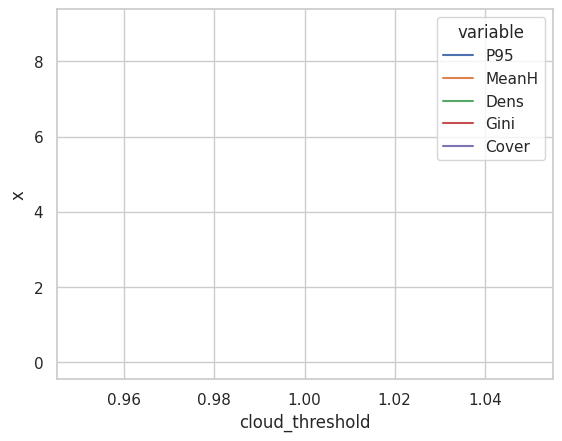

In [29]:
sns.lineplot(data=global_df, x="cloud_threshold", 
            hue="variable", y="x")

In [84]:
"10".isnumeric()

True

In [93]:
import os
from pathlib import Path
data = {}
for project in os.scandir(Path("/scratch/ewalt/pdm/rs-uncertainty/assets/data/sentinel_data/s2_reprojected")):
    if project.name.isnumeric():
        data[project.name] = len(list(Path(project.path).glob("*.tif")))
data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))

In [94]:
data

{'909': 14,
 '528': 13,
 '835': 11,
 '542': 10,
 '998': 10,
 '564': 10,
 '537': 8,
 '9': 8,
 '416': 8,
 '769': 8,
 '1023': 7,
 '471': 7,
 '521': 6,
 '477': 6,
 '959': 6,
 '827': 6,
 '522': 6,
 '920': 6,
 '472': 6,
 '527': 6,
 '819': 5,
 '891': 5,
 '560': 4,
 '354': 4,
 '429': 4,
 '346': 4,
 '988': 4,
 '415': 4,
 '418': 4,
 '896': 4,
 '805': 3,
 '796': 3,
 '764': 2,
 '341': 2,
 '439': 2,
 '781': 2,
 '426': 2,
 '498': 2,
 '825': 2,
 '342': 2,
 '792': 2}

In [156]:
fig.colorbar?

In [183]:
plot_project_cloud_maps("909")
plot_project_cloud_maps("920")
plot_project_cloud_maps("528")
plot_project_cloud_maps("564")

KeyboardInterrupt: 

In [128]:
from datetime import datetime
import math
def pjoin(*subs): return Path(os.path.join(*subs))
def parse_date(date_str) -> datetime: return datetime.strptime(date_str, '%Y%m%d')
import rasterio


pid = "920"
patch_size = 15
s2_dir = Path(f"/scratch/ewalt/pdm/rs-uncertainty/assets/data/sentinel_data/s2_reprojected/{pid}")


cloud_maps = []
dates = []
s2_paths = list(s2_dir.glob("*.tif"))
for i, s2_path in enumerate(s2_paths):
    with rasterio.open(s2_path) as fh:
        cloud_map = fh.read(13)
    cloud_maps.append(cloud_map)
    date = parse_date(s2_path.stem.split('_')[3].split('T')[0])
    dates.append(date)


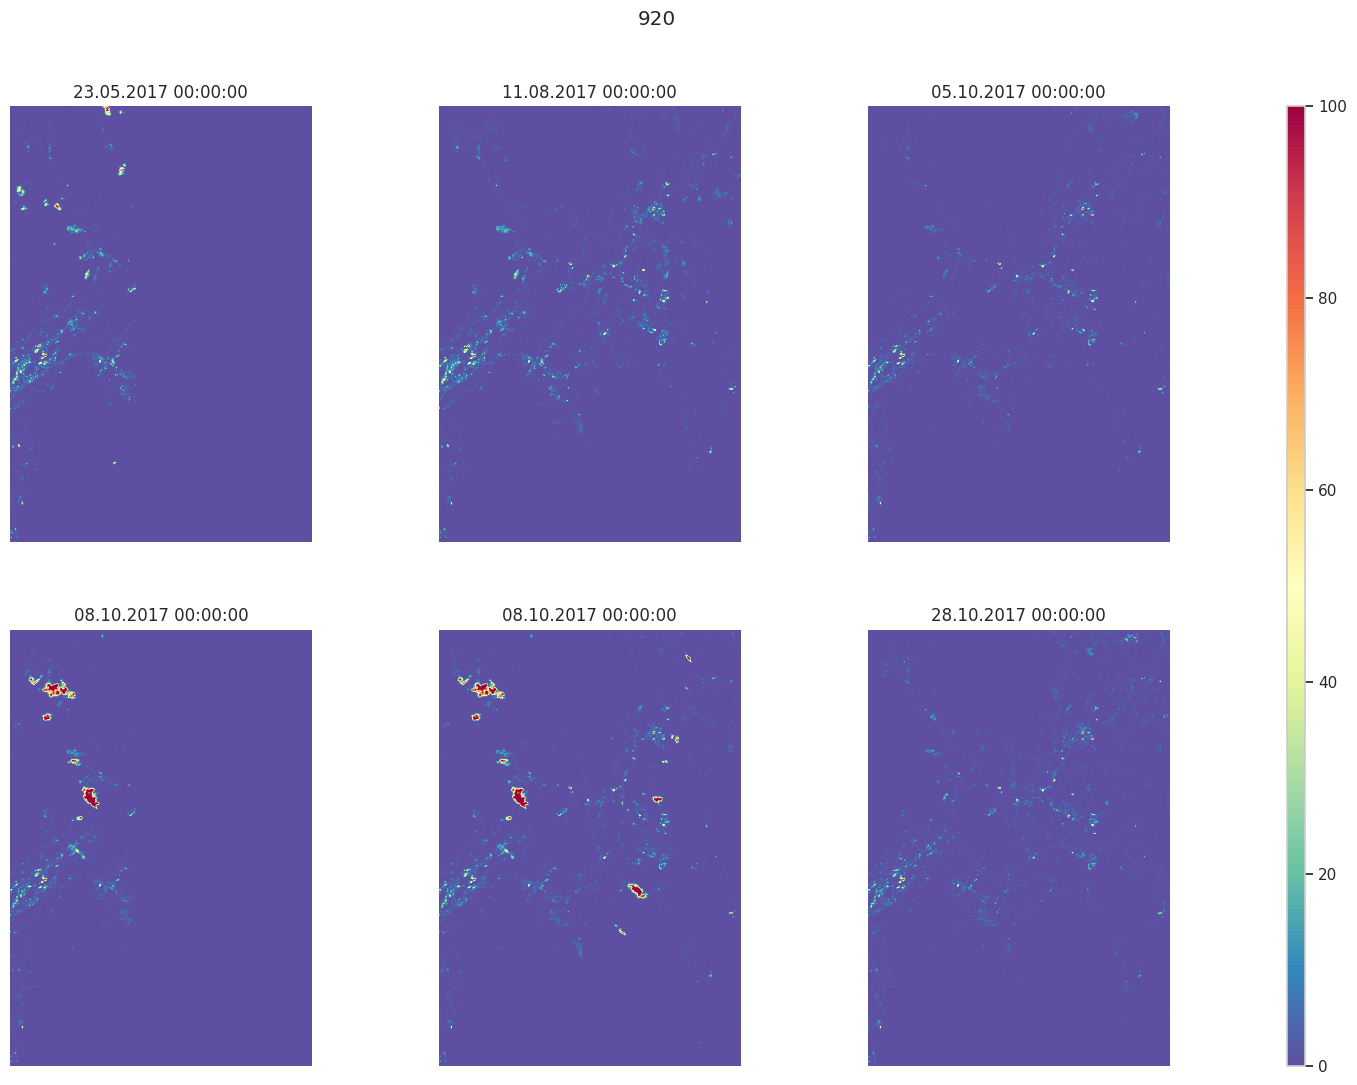

In [180]:
cmap = "Spectral_r"
max_cols = 3


cloud_maps, dates = list(zip(*sorted(zip(cloud_maps, dates), key=lambda x: x[1])))
N = len(cloud_maps)
ncols = max_cols
nrows = math.ceil(N/ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols,6*nrows))
axs = axs.flatten()
fig.suptitle(pid)
for i, (date, cloud_map) in enumerate(zip(dates, cloud_maps)):
    axs[i].set_title(date.strftime("%d.%m.%Y %H:%M:%S"))
    im = axs[i].imshow(cloud_map, cmap=cmap)
    axs[i].set_axis_off()
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = fig.add_axes([0.85, 0.1, 0.01, 0.8])
fig.colorbar(im, cax=cax)
plt.show()

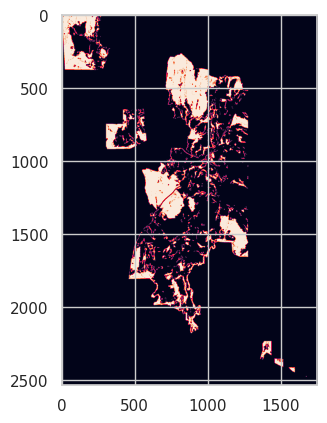

In [98]:
import matplotlib.pyplot as plt
plt.imshow(valid_mask)

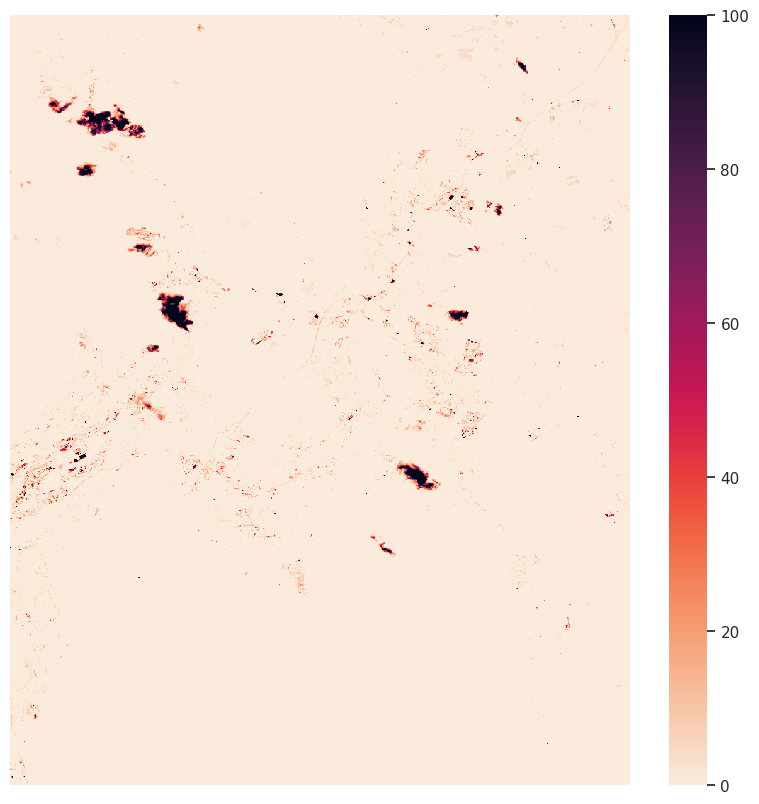

In [114]:
fig = plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(cloud_mask, cmap="rocket_r")
plt.title(date)
plt.axis("off")
plt.show()

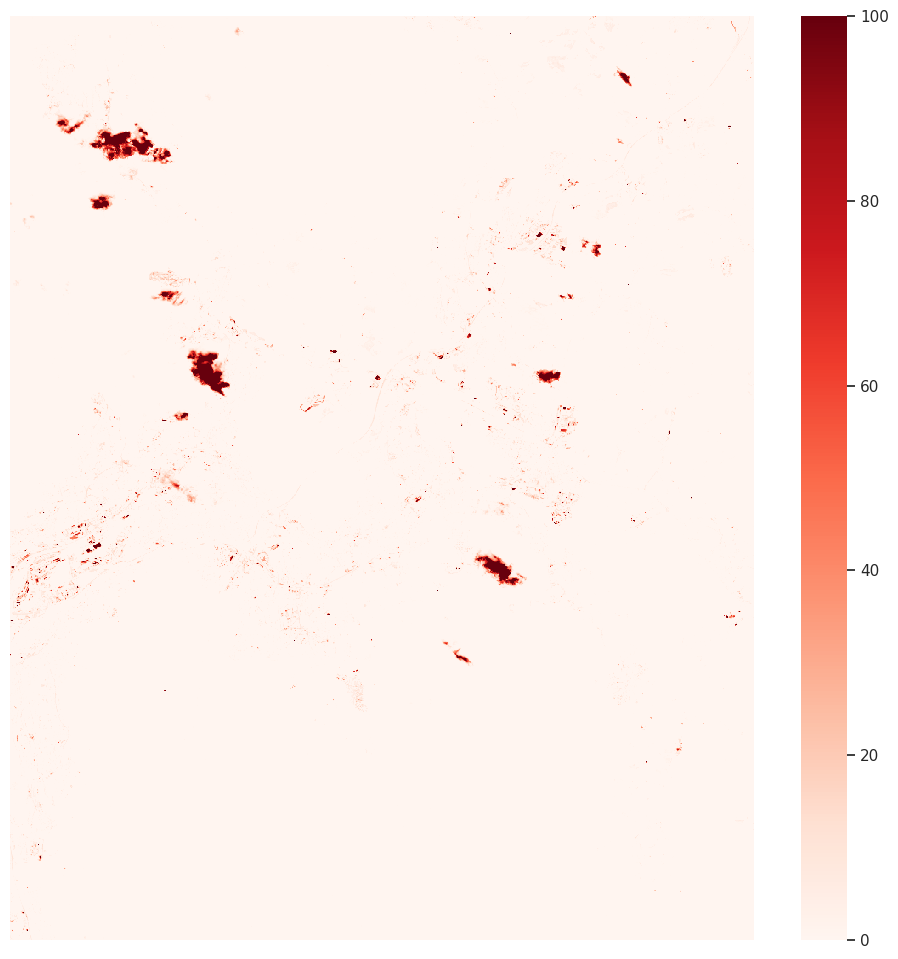

In [123]:
fig = plt.figure(figsize=(12,12))
import seaborn as sns
sns.heatmap(cloud_mask, cmap=sns.color_palette("Reds", as_cmap=True))
plt.axis("off")
plt.show()

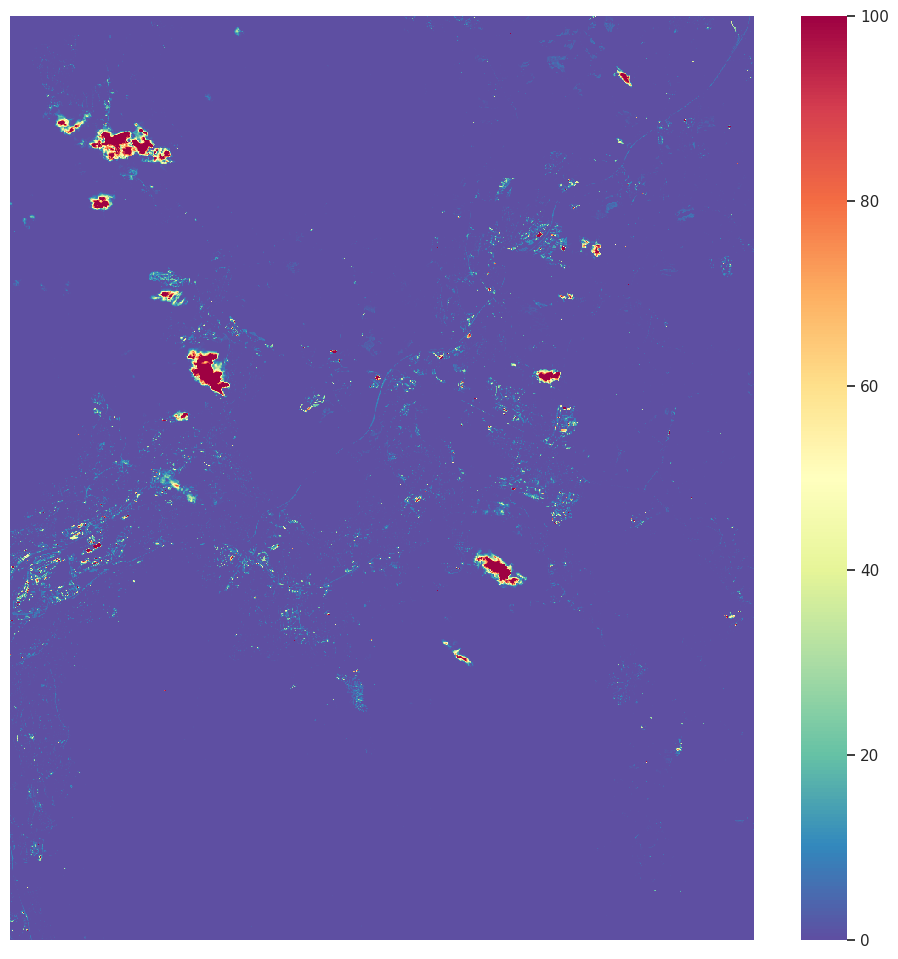

In [124]:
fig = plt.figure(figsize=(12,12))
import seaborn as sns
sns.heatmap(cloud_mask, cmap="Spectral_r")
plt.axis("off")
plt.show()

In [100]:
np.unique(cloud_mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=uint16)

In [148]:
date.strftime("%d.%m.%Y %H:%M:%S")

'08.10.2017 00:00:00'

In [146]:
datetime.strptime?

In [1]:
import re

In [12]:
int(re.findall("counts=\d+", "bin_id=10 whatever=[0,1] counts=10")[0].split("=")[1])

10

In [8]:
import torch

patch_means, patch_variances = [], []
for _ in range(3):
    patch_mean, patch_variance = torch.zeros((1, 5, 15, 15)), torch.zeros((1, 5, 15, 15))
    patch_means.append(patch_mean)
    patch_variances.append(patch_variance)

In [9]:
torch.cat(patch_means)[1].shape

torch.Size([5, 15, 15])

In [ ]:
# dirs, s2repr_dirs
for d, ax in zip(dirs, axs):
    dir_name = d.split("/")[-1]
    pid = dir_name.split("_")[0]
    img_path = list(Path(os.path.join(s2repr_dirs, dir_name, pid)).glob("*.tif"))[0]
    variance_path = os.path.join(d, f"{pid}_variance.tif")
    mean_path = os.path.join(d, f"{pid}_mean.tif")
    gt_path = os.path.join(gt_dir, f"{pid}.tif")

In [ ]:
def getPaths(
    src_dir, 
    s2repr_dirs, 
    gt_dir=None,
    returns=None
):
    if returns is None:
        return
    rname = lambda x: "_".join(Path(x).stem.split("_")[1:])
    valid_returns = ["img", "gt"] + [rname(p.path) for p in os.scandir(src_dir)]
    # start logic
    dir_name = src_dir.split("/")[-1]
    pid = dir_name.split("_")[0]
    retuple = []
    for r in returns: 
        assert r in valid_returns
        if r=="img":
            retuple.append(
                list(Path(os.path.join(s2repr_dirs, dir_name, pid)).glob("*.tif"))[0]
            )
        elif r=="gt":
            assert gt_dir is not None, "must provide gt_dir to get gt"
            retuple.append(os.path.join(gt_dir, f"{pid}.tif"))
        else:
            retuple.append(os.path.join(src_dir, f"{pid}_{r}.tif"))            
    return tuple(retuple)

In [4]:
from pathlib import Path
rname = lambda x: "_".join(Path(x).stem.split("_")[1:])
rname("/lol/lolilol/10_df_xorg.tif")

'df_xorg'